# nearest_nodes

Find the nearest node to a point or to each of several points.

In [1]:
# OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks
import osmnx as ox

ox.config(use_cache=True, log_console=False)
ox.__version__

'1.1.2'

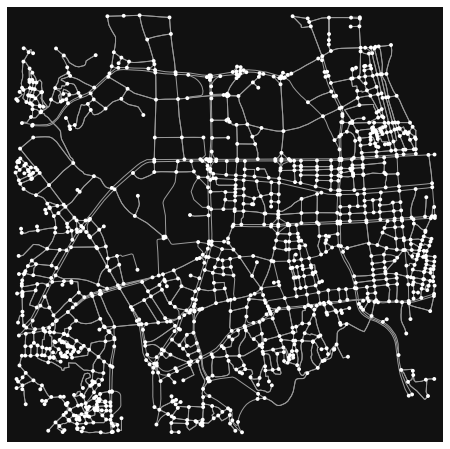

In [2]:
center_point = (37.5661, 126.9783) # (lat, lng) Seoul, South Korea
dist = 1500
dist_type = 'bbox' # "network", "bbox"
network_type = 'drive' # "all_private", "all", "bike", "drive", "drive_service", "walk"

# Create a graph from OSM within some distance of some (lat, lng) point.
G = ox.graph_from_point(
    center_point,
    dist=dist, 
    dist_type=dist_type,
    network_type=network_type)

# Plot a graph.
fig, ax = ox.plot_graph(G)

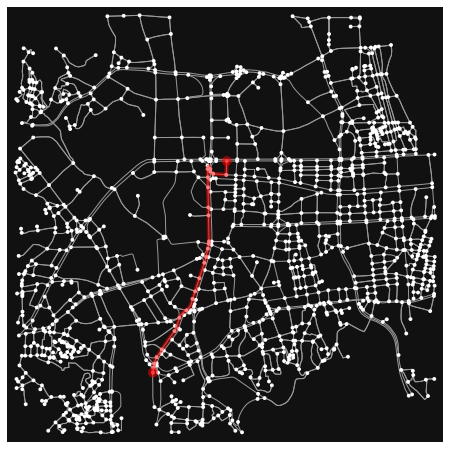

In [3]:
# Set origin and destination node ID
origXY = (126.97811, 37.56990) # XY (lon,lat) : 광화문 우체국
destXY = (126.97223, 37.55595) # XY (lon,lat) : 서울역

# Find the nearest node to a point or to each of several points.
orig = ox.distance.nearest_nodes(G, origXY[0], origXY[1], return_dist=False)
dest = ox.distance.nearest_nodes(G, destXY[0], destXY[1], return_dist=False)

# Solve shortest path from origin node(s) to destination node(s).
route = ox.distance.shortest_path(G, orig, dest, weight='length', cpus=1)

# Plot a route along a graph.
fig, ax = ox.plot_graph_route(G, route)